<a href="https://colab.research.google.com/github/Bagyalakshmi1429/machine_learning/blob/main/AML_PROJECT_BDN(NEW)ipynb_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.shape

(5110, 12)

In [ ]:
# Impute missing 'bmi' values with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

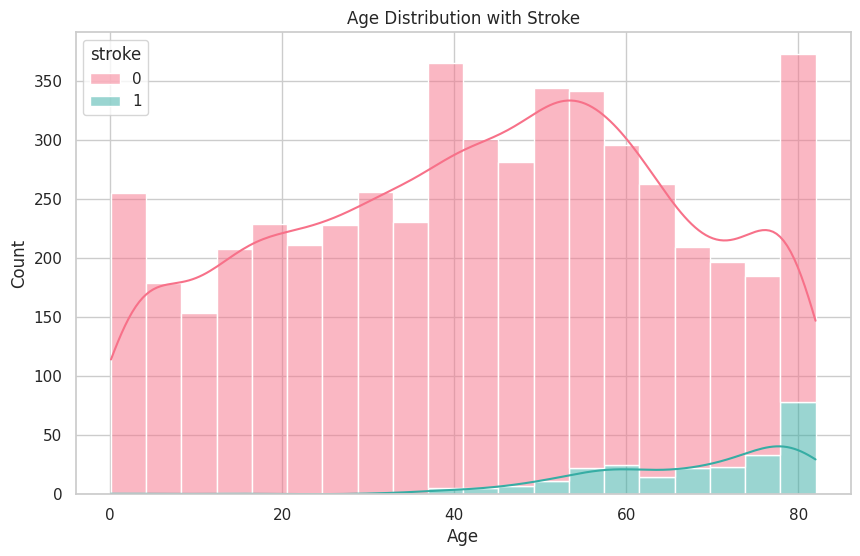

In [ ]:
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, hue='stroke', multiple='stack', palette='husl')
plt.title('Age Distribution with Stroke')
plt.xlabel('Age')
plt.show()

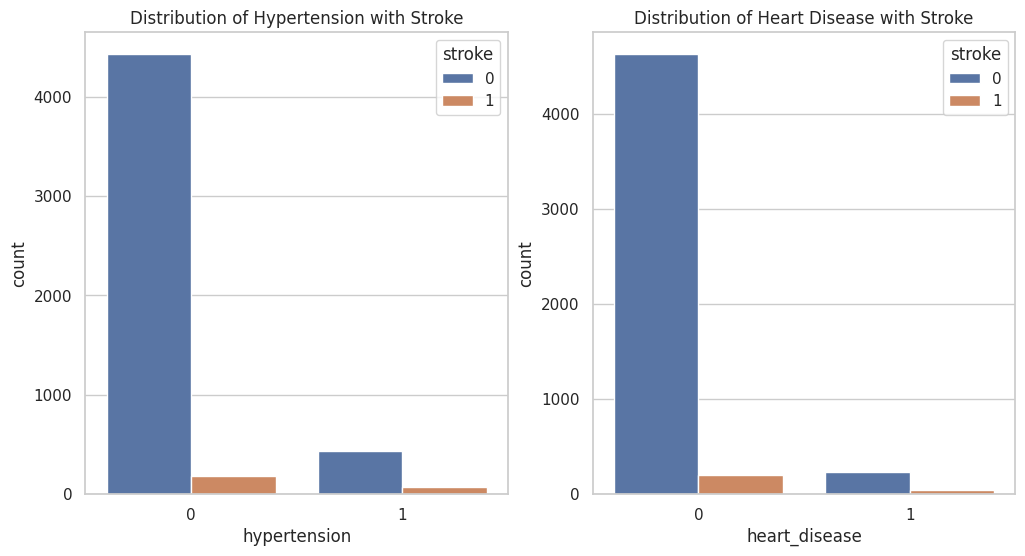

In [ ]:
# Distribution of Hypertension and Heart Disease with Stroke
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Distribution of Hypertension with Stroke')

plt.subplot(1, 2, 2)
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Distribution of Heart Disease with Stroke')

plt.show()

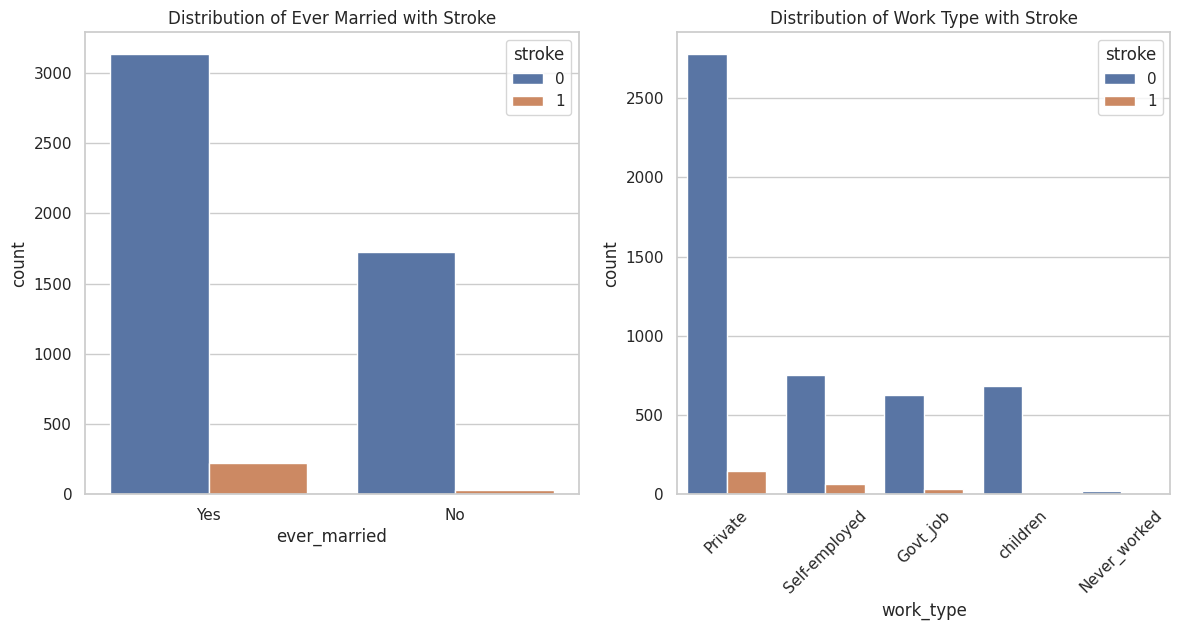

In [ ]:
# Barplot for Ever Married and Work Type
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Distribution of Ever Married with Stroke')

plt.subplot(1, 2, 2)
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Distribution of Work Type with Stroke')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Separate features and target variable
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Logistic Regression
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(random_state=42))])
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Assuming you have variables named 'y_test' and 'X_test' for testing data
# Replace 'model' with the actual variable names of your models

# Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_recall_f1_support_logreg = precision_recall_fscore_support(y_test, y_pred_logreg, average='binary')
report_logreg = classification_report(y_test, y_pred_logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

In [ ]:
# Display the results for each model
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_logreg)
print("Precision, Recall, F1-score, Support:", precision_recall_f1_support_logreg)
print("Classification Report:\n", report_logreg)
print("\n")

Logistic Regression Evaluation:
Accuracy: 0.9393346379647749
Precision, Recall, F1-score, Support: (0.0, 0.0, 0.0, None)
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022





In [ ]:
# Decision Tree
dtree = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])
dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Decision Tree
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_recall_f1_support_dtree = precision_recall_fscore_support(y_test, y_pred_dtree, average='binary')
report_dtree = classification_report(y_test, y_pred_dtree)

In [ ]:
print("Decision Tree Evaluation:")
print("Accuracy:", accuracy_dtree)
print("Precision, Recall, F1-score, Support:", precision_recall_f1_support_dtree)
print("Classification Report:\n", report_dtree)
print("\n")

Decision Tree Evaluation:
Accuracy: 0.9119373776908023
Precision, Recall, F1-score, Support: (0.16666666666666666, 0.11290322580645161, 0.1346153846153846, None)
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.17      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.56      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022





In [ ]:
# Random Forest
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(random_state=42))])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_recall_f1_support_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')
report_rf = classification_report(y_test, y_pred_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

In [ ]:

print("Random Forest Evaluation:")
print("Accuracy:", accuracy_rf)
print("Precision, Recall, F1-score, Support:", precision_recall_f1_support_rf)
print("Classification Report:\n", report_rf)
print("\n")


Random Forest Evaluation:
Accuracy: 0.9393346379647749
Precision, Recall, F1-score, Support: (0.0, 0.0, 0.0, None)
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022





In [ ]:
# SVM
svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(random_state=42))])
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# SVM
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_recall_f1_support_svm = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
report_svm = classification_report(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  beta : float
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted 

In [ ]:
print("SVM Evaluation:")
print("Accuracy:", accuracy_svm)
print("Precision, Recall, F1-score, Support:", precision_recall_f1_support_svm)
print("Classification Report:\n", report_svm)

SVM Evaluation:
Accuracy: 0.9393346379647749
Precision, Recall, F1-score, Support: (0.0, 0.0, 0.0, None)
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [ ]:
# Model Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    return accuracy, confusion_mat, classification_rep

In [ ]:

# Logistic Regression Evaluation
accuracy_logreg, _, report_logreg = evaluate_model(y_test, y_pred_logreg)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Decision Tree Evaluation
accuracy_dtree, _, report_dtree = evaluate_model(y_test, dtree.predict(X_test))


In [ ]:
 !pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


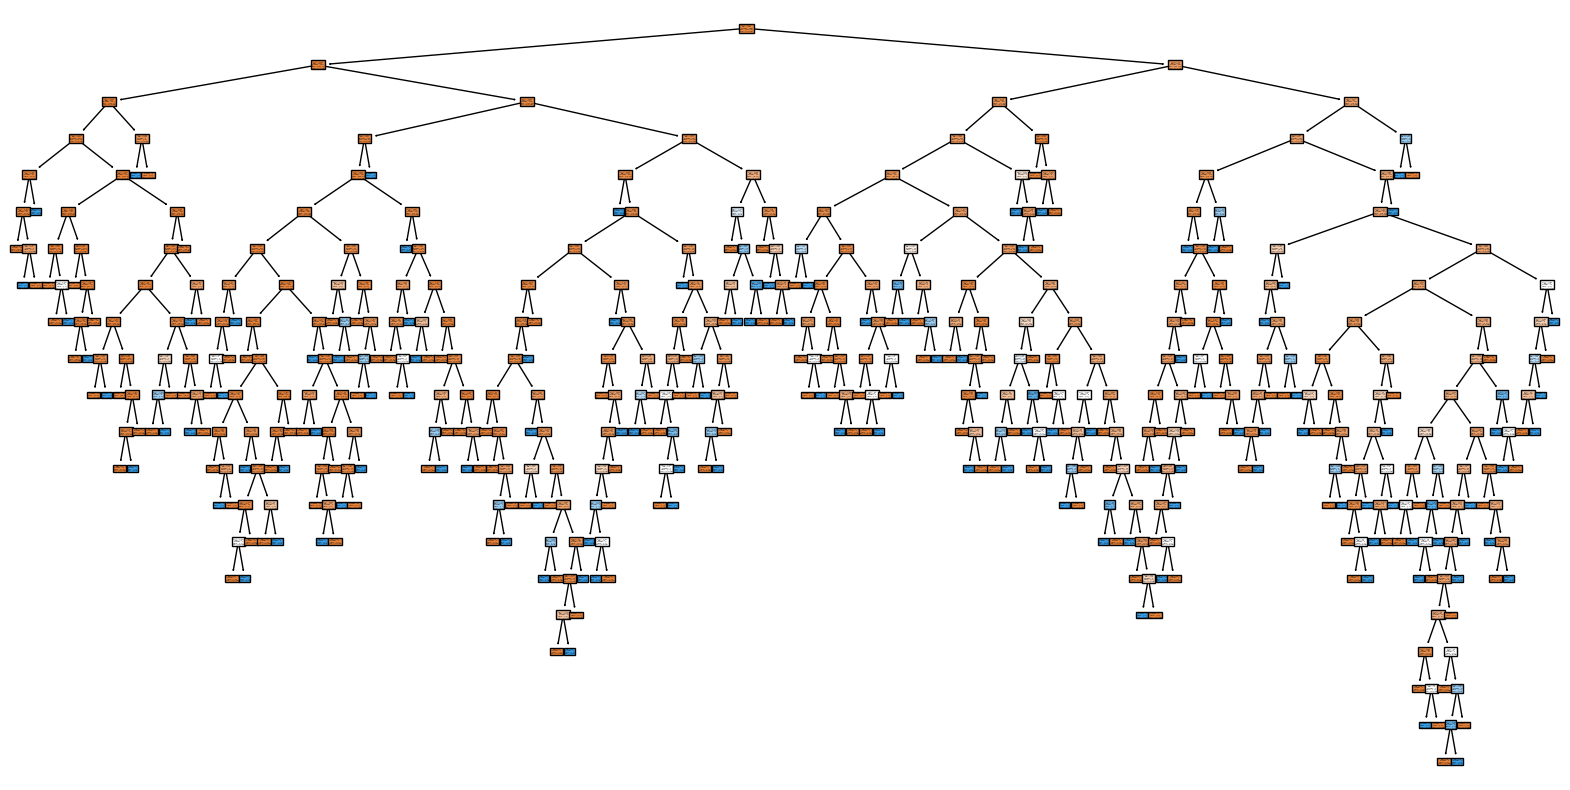

In [ ]:
# Visualize Decision Tree within the Pipeline
dtree_model = dtree.named_steps['classifier']

plt.figure(figsize=(20, 10))
plot_tree(dtree_model, filled=True, class_names=['No Stroke', 'Stroke'])
plt.show()



In [ ]:
# Random Forest Evaluation
accuracy_rf, _, report_rf = evaluate_model(y_test, rf.predict(X_test))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SVM Evaluation
accuracy_svm, _, report_svm = evaluate_model(y_test, y_pred_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Display Results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Decision Tree Accuracy:", accuracy_dtree)
print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)

Logistic Regression Accuracy: 0.9393346379647749
Decision Tree Accuracy: 0.9119373776908023
Random Forest Accuracy: 0.9393346379647749
SVM Accuracy: 0.9393346379647749


UNSUPERVISED


In [ ]:

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Unsupervised Learning - K-Means Clustering
kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                          ('clusterer', KMeans(n_clusters=2, random_state=42))])

X_clustered = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d0f3a64be20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
 

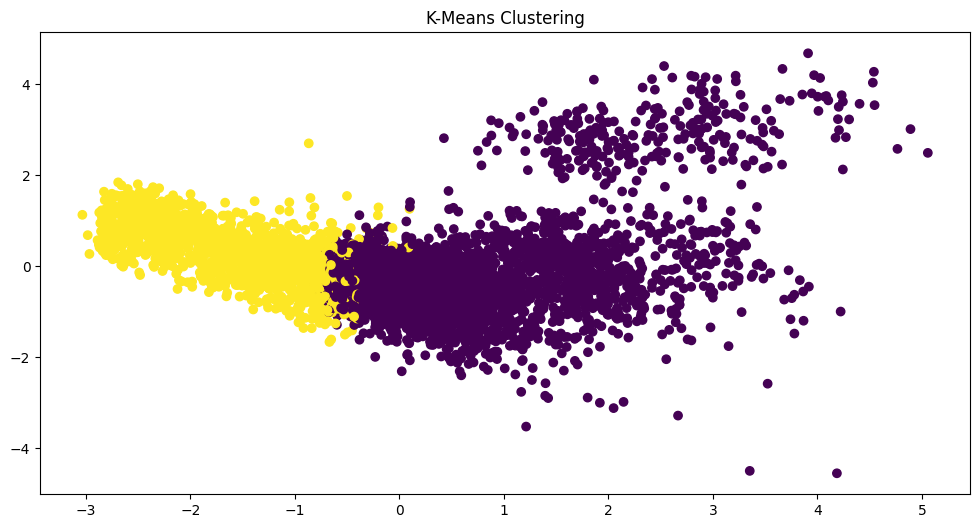

In [ ]:
# Unsupervised Learning - PCA (Dimensionality Reduction)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(preprocessor.fit_transform(X))

# Visualize K-Means Clustering
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_clustered, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()


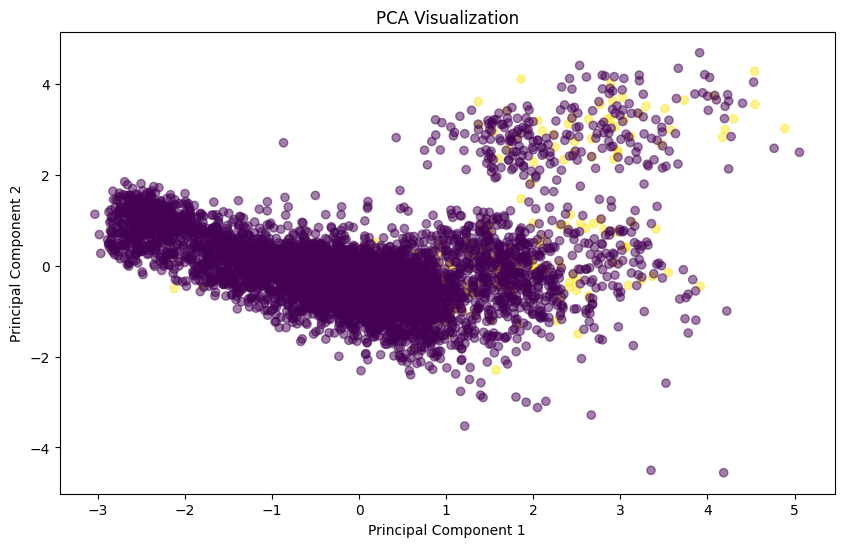

In [ ]:
# Visualize PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

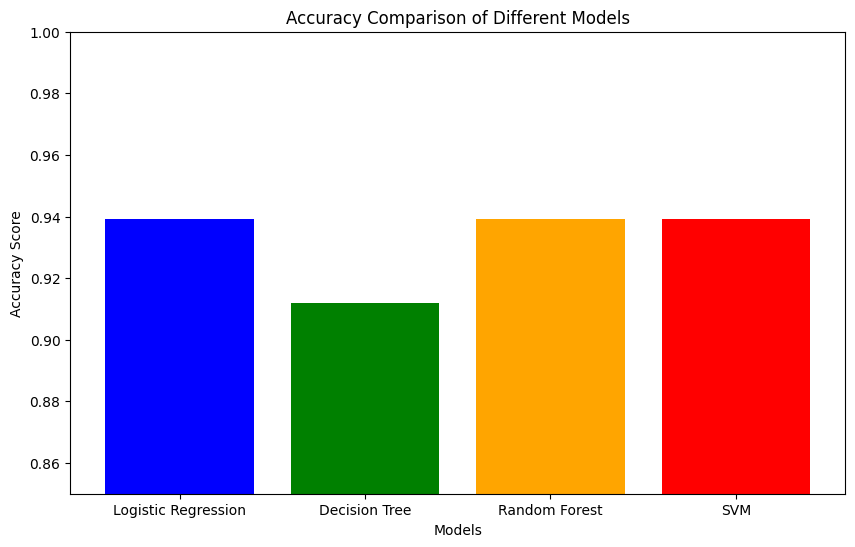

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_logreg, accuracy_dtree, accuracy_rf, accuracy_svm]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.85, 1.0)  # Set y-axis limit for better visualization
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()


In [ ]:
# Logistic Regression with PCA-transformed features
logreg_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2, random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
logreg_pca.fit(X_train, y_train)

# Predictions using PCA-transformed features
y_pred_pca = logreg_pca.predict(X_test)

# Evaluate the model's accuracy
accuracy_pca, _, report_pca = evaluate_model(y_test, y_pred_pca)

# Display Results
print("PCA with Logistic Regression Accuracy:", accuracy_pca)

PCA with Logistic Regression Accuracy: 0.9393346379647749


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
